In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
df = pd.read_csv('/Users/xinqu/Sandbox/CS498 Applied Machine Learning/HW/HW7/yelp_2k.csv')
df = df[['text', 'stars']]
df.head()

,text,stars
0,This car wash sucks. Paid $40 for the Ultimat...,1
1,I was referred to Earnie by friends and since ...,5
2,"The food is okay, but they have the worst serv...",1
3,Opting out from the noise and hustle of Flo's ...,1
4,"Basically, unlimited steak. If you like steak,...",5


Part 1

In [2]:
import re
df['clean_text'] = df.text.apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, 
                             token_pattern = u"(?u)\\b\\w+\\b", stop_words = None, max_features = 100000) 
train_data_features = vectorizer.fit_transform(df['clean_text'])
#vectorizer.transform([df.iloc[0]['text']]).toarray()

In [3]:
train_data_features.shape

(2000, 12852)

In [4]:
sum_words = train_data_features.sum(axis = 0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse =True)
words_freq[:20]

[(u'the', 11041),
 (u'and', 8107),
 (u'i', 7511),
 (u'to', 6565),
 (u'a', 5498),
 (u'was', 3817),
 (u'it', 3333),
 (u'of', 3040),
 (u'for', 2728),
 (u'in', 2703),
 (u'my', 2606),
 (u'is', 2604),
 (u'that', 2321),
 (u'they', 2295),
 (u'this', 2116),
 (u'we', 2029),
 (u'you', 1962),
 (u'with', 1817),
 (u't', 1802),
 (u'on', 1719)]

In [5]:
words = pd.DataFrame(words_freq, columns = ['word', 'count'])
words['word_rank'] = words['count'].rank(ascending = False)
words.head()

,word,count,word_rank
0,the,11041,1.0
1,and,8107,2.0
2,i,7511,3.0
3,to,6565,4.0
4,a,5498,5.0


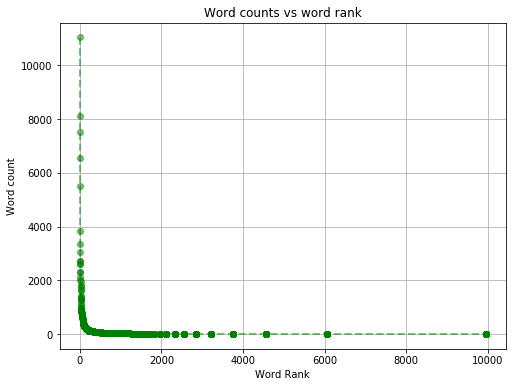

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8, 6))
plt.plot(words['word_rank'], words['count'], color='g', linestyle='dashed', marker = 'o',linewidth=2,alpha=0.5)
plt.xlabel('Word Rank')
plt.ylabel('Word count')
plt.title('Word counts vs word rank')
plt.grid()

In [7]:
stop_words_list_max = words['word'][words['count'] > 250].values.tolist() ##threshold = 250
stop_words_list_max

[u'the',
 u'and',
 u'i',
 u'to',
 u'a',
 u'was',
 u'it',
 u'of',
 u'for',
 u'in',
 u'my',
 u'is',
 u'that',
 u'they',
 u'this',
 u'we',
 u'you',
 u'with',
 u't',
 u'on',
 u'not',
 u'have',
 u'but',
 u'had',
 u'me',
 u'at',
 u's',
 u'so',
 u'were',
 u'are',
 u'be',
 u'place',
 u'food',
 u'there',
 u'as',
 u'he',
 u'if',
 u'all',
 u'when',
 u'out',
 u'would',
 u'service',
 u'get',
 u'our',
 u'she',
 u'back',
 u'one',
 u'up',
 u'time',
 u'from',
 u'very',
 u'an',
 u'just',
 u'their',
 u'here',
 u'no',
 u'will',
 u'great',
 u'like',
 u'good',
 u'go',
 u'about',
 u'them',
 u'or',
 u'can',
 u'what',
 u'your',
 u'us',
 u'been',
 u'do',
 u'never',
 u'because',
 u'only',
 u'don',
 u'even',
 u'after',
 u'by',
 u'which',
 u'did',
 u'got',
 u'said',
 u'more',
 u'her',
 u'really',
 u'told',
 u'also',
 u'could',
 u'some',
 u'other',
 u'then',
 u'went',
 u've',
 u'over',
 u'has',
 u'well',
 u'didn',
 u'again',
 u'm',
 u'first',
 u'best',
 u'people',
 u'staff',
 u'who',
 u'going',
 u'came',
 u'order',

In [8]:
len(stop_words_list_max)

134

In [9]:
vec_max = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, 
                          token_pattern = u"(?u)\\b\\w+\\b", 
                          stop_words = stop_words_list_max, max_features = 100000) 
train_data_features_max = vec_max.fit_transform(df['clean_text'])
sum_words_max = train_data_features_max.sum(axis = 0)
words_freq_max = [(word, sum_words_max[0, idx]) for word, idx in vec_max.vocabulary_.items()]
words_freq_max = sorted(words_freq_max, key = lambda x: x[1], reverse =True)
words_max = pd.DataFrame(words_freq_max, columns = ['word', 'count'])
words_max['word_rank'] = words_max['count'].rank(ascending = False)
words_max.head()

,word,count,word_rank
0,now,250,1.0
1,want,249,2.0
2,called,247,3.0
3,definitely,246,4.0
4,work,243,5.0


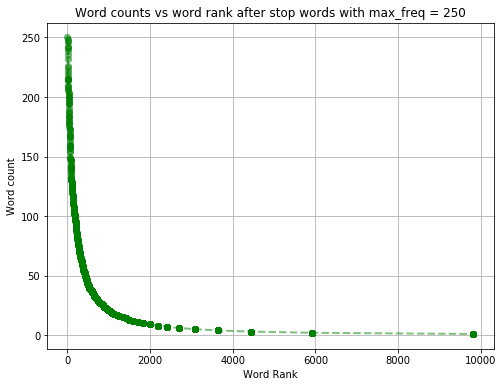

In [10]:
plt.figure(figsize=(8, 6))
plt.plot(words_max['word_rank'], words_max['count'], color='g', linestyle='dashed', 
         marker = 'o',linewidth=2,alpha=0.5)
plt.xlabel('Word Rank')
plt.ylabel('Word count')
plt.title('Word counts vs word rank after stop words with max_freq = 250')
plt.grid()

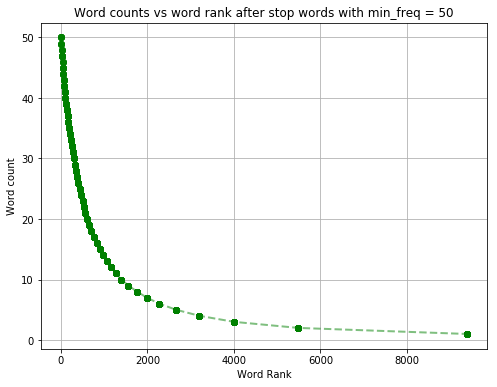

In [11]:
##threshold = 50
stop_words_list_min = words['word'][words['count'] > 50].values.tolist()
vec_min = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, 
                          token_pattern = u"(?u)\\b\\w+\\b", 
                          stop_words = stop_words_list_min, max_features = 100000) 
train_data_features_min = vec_min.fit_transform(df['clean_text'])
sum_words_min = train_data_features_min.sum(axis = 0)
words_freq_min = [(word, sum_words_min[0, idx]) for word, idx in vec_min.vocabulary_.items()]
words_freq_min = sorted(words_freq_min, key = lambda x: x[1], reverse =True)
words_min = pd.DataFrame(words_freq_min, columns = ['word', 'count'])
words_min['word_rank'] = words_min['count'].rank(ascending = False)
plt.figure(figsize=(8, 6))
plt.plot(words_min['word_rank'], words_min['count'], color='g', 
         linestyle='dashed', marker = 'o',linewidth=2,alpha=0.5)
plt.xlabel('Word Rank')
plt.ylabel('Word count')
plt.title('Word counts vs word rank after stop words with min_freq = 50')
plt.grid()

In [12]:
#stop_words_list_min
len(stop_words_list_min)

561

Set threshold = 250

Part 2 use max frequency

In [13]:
#from sklearn.metrics.pairwise import cosine_similarity
max_array = train_data_features_max.toarray() ##bag_of_words threshold = 250
query = vec_max.transform(['Horrible customer service']).toarray()

In [14]:
def cos_distance(a, b):
    return 1.0 * np.dot(a, b.T) / (np.linalg.norm(a) * np.linalg.norm(b))
cos_sim = np.zeros(2000,)
for i in range(2000):
    cos_sim[i] = cos_distance(max_array[i], query)

In [15]:
df['cosim'] = cos_sim
df_disc = df.sort_values(by = ['cosim'], ascending = False)
for i in range(5):
    text = df_disc.iloc[i]['text']
    dis = df_disc.iloc[i]['cosim']
    print(text + '\n' + 'cosine distance score: ' + str(dis) +'\n')

Service was horrible came with a major attitude. Payed 30 for lasagna and was no where worth it. Won't ever be going back and will NEVER recommend this place. was treated absolutely horrible. Horrible.
cosine distance score: 0.6882472016116852

HORRIBLE HORRIBLE HORRIBLE!!! AVOID AT ALL COSTS!!!

I had some work done at Swing Shift Auto and I was helped by Keith. He was very arrogant and had little time for me. I just needed new brake discs and pads. I was overcharged, the repairs took TWO DAYS, and when I got home i noticed that the discs had NOT been replaced, only the pads!!!!

TOTAL RIPOFFF!!! NEVER GO HERE, PLEASE!!!
cosine distance score: 0.4743416490252569

Horrible service, horrible customer service, and horrible quality of service!  Do not waste your time or money using this company for your pool needs.  Dan (602)363-8267 broke my pool filtration system and left it in a nonworking condition.  He will not repair the issue he caused, and told me to go somewhere else.  

Save you

In [16]:
df_disc[:60]

,text,stars,clean_text,cosim
729,Service was horrible came with a major attitud...,1,Service was horrible came with a major attitud...,0.688247
479,HORRIBLE HORRIBLE HORRIBLE!!! AVOID AT ALL COS...,1,HORRIBLE HORRIBLE HORRIBLE AVOID AT ALL COS...,0.474342
90,"Horrible service, horrible customer service, a...",1,Horrible service horrible customer service a...,0.447214
1961,"I was in there a few weeks ago, the lady who t...",1,I was in there a few weeks ago the lady who t...,0.417029
1763,Horrible experience! Got there at 1 am and the...,1,Horrible experience Got there at am and the...,0.353553
1840,Horrible service....What a mess upon ordering ...,1,Horrible service What a mess upon ordering ...,0.333333
1354,The food is okay but the service is horrible. ...,1,The food is okay but the service is horrible ...,0.333333
1131,I don't understand how people pay money to eat...,1,I don t understand how people pay money to eat...,0.324443
1842,Horrible service! Food was not great either. O...,1,Horrible service Food was not great either O...,0.316228
866,They have no concept of making an authentic sh...,1,They have no concept of making an authentic sh...,0.316228


In [17]:
len(df_disc['cosim'][df_disc['cosim'] >= 0.15])

54

Part 3 Logistic regression

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(train_data_features_max, df['stars'], 
                                                    test_size = 0.1, random_state = 42)

In [19]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight = 'balanced')
logreg.fit(X_train, y_train)
threshold = 0.5
predicts = np.where(logreg.predict_proba(X_test)[:, 1] > threshold, 5, 1)

In [20]:
accuracy_score(np.where(logreg.predict_proba(X_train)[:, 1] > threshold, 5, 1), y_train)  
###train set accuracy score

0.9994444444444445

In [21]:
accuracy_score(predicts, y_test) ###test set accuracy score

0.925

Plot histogram of scores on training data

In [22]:
pos_score = logreg.predict_proba(X_train)[:, 1][np.where(logreg.predict_proba(X_train)[:, 1] > threshold)]
neg_score = logreg.predict_proba(X_train)[:, 0][np.where(logreg.predict_proba(X_train)[:, 0] <= threshold)]

In [23]:
pos_train = logreg.predict_proba(X_train)[:, 1][np.where(y_train[logreg.predict_proba(X_train)[:, 1] > threshold]== 5)]
neg_train = logreg.predict_proba(X_train)[:, 0][np.where(y_train[logreg.predict_proba(X_train)[:, 1] <= threshold]== 1)]

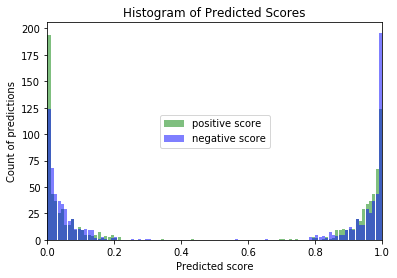

In [24]:
plt.hist(pos_train, bins = 100, color = 'g', alpha = 0.5, density = False, rwidth = 0.9, label = 'positive score')
plt.hist(neg_train, bins = 100, color = 'b', alpha = 0.5, density = False, rwidth = 0.9, label = 'negative score')
plt.xlim(0, 1.0)
plt.xlabel('Predicted score')
plt.ylabel('Count of predictions')
plt.title('Histogram of Predicted Scores')
plt.legend(loc = 'center')
plt.show()

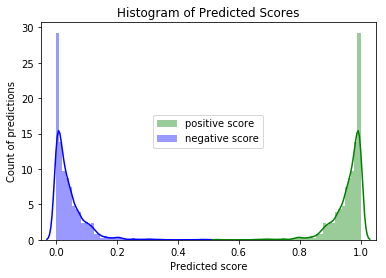

In [25]:
import seaborn as sns
sns.distplot(pos_score, color = 'g', label = 'positive score')
sns.distplot(neg_score, color = 'b', label = 'negative score')
plt.xlim(-0.05, 1.05)
plt.xlabel('Predicted score')
plt.ylabel('Count of predictions')
plt.title('Histogram of Predicted Scores')
plt.legend(loc = 'center')
plt.show()

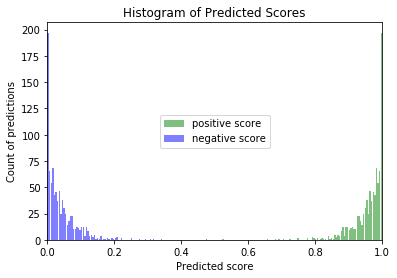

In [26]:
plt.hist(pos_score, bins = 100, color = 'g', alpha = 0.5, density = False, rwidth = 0.9, label = 'positive score')
plt.hist(neg_score, bins = 100, color = 'b', alpha = 0.5, density = False, rwidth = 0.9, label = 'negative score')
plt.xlim(0, 1.0)
plt.xlabel('Predicted score')
plt.ylabel('Count of predictions')
plt.title('Histogram of Predicted Scores')
plt.legend(loc = 'center')
plt.show()

In [27]:
threshold_n = 0.4
predicts_n = np.where(logreg.predict_proba(X_test)[:, 1] > threshold_n, 5, 1)
accuracy_score(np.where(logreg.predict_proba(X_train)[:, 1] > threshold_n, 5, 1), y_train)  
###train set accuracy score

0.9988888888888889

In [28]:
accuracy_score(predicts_n, y_test) ###test set accuracy score

0.93

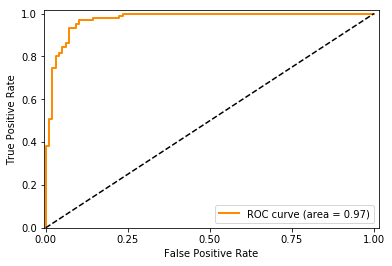

In [29]:
from sklearn.metrics import roc_curve, auc
y_scores = logreg.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_scores, pos_label = 5)
plt.plot(fpr, tpr, linewidth = 2, color = 'darkorange', label = 'ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.005, 1.015, 0, 1.015])
plt.xticks(np.arange(0, 1.25, 0.25))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')

In [30]:
fpr[np.argmax(tpr)]

0.23469387755102042

In [31]:
test = np.arange(0.1, 1.0, 0.1)
train_score = []
test_score = []
for i in test:
    predicts = np.where(logreg.predict_proba(X_test)[:, 1] > i, 5, 1)
    train_score.append(accuracy_score(np.where(logreg.predict_proba(X_train)[:, 1] > i, 5, 1), y_train))  
    ###train set accuracy score
    test_score.append(accuracy_score(predicts, y_test)) ###test set accuracy score

In [32]:
train_score, test_score

([0.9411111111111111,
  0.9888888888888889,
  0.9955555555555555,
  0.9988888888888889,
  0.9994444444444445,
  1.0,
  0.9983333333333333,
  0.9916666666666667,
  0.9472222222222222],
 [0.86, 0.88, 0.915, 0.93, 0.925, 0.9, 0.895, 0.86, 0.79])